Instalando bibliotecas... (pode levar um minuto)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.0 MB/s eta 0:00:00
Bibliotecas instaladas e importadas com sucesso!

Arquivos carregados e dados prontos para o processamento!

Dados geográficos e quantitativos foram unidos com sucesso!
Gerando o mapa de calor...

Mapa finalizado e salvo como 'mapa_estrategico_rn.png'


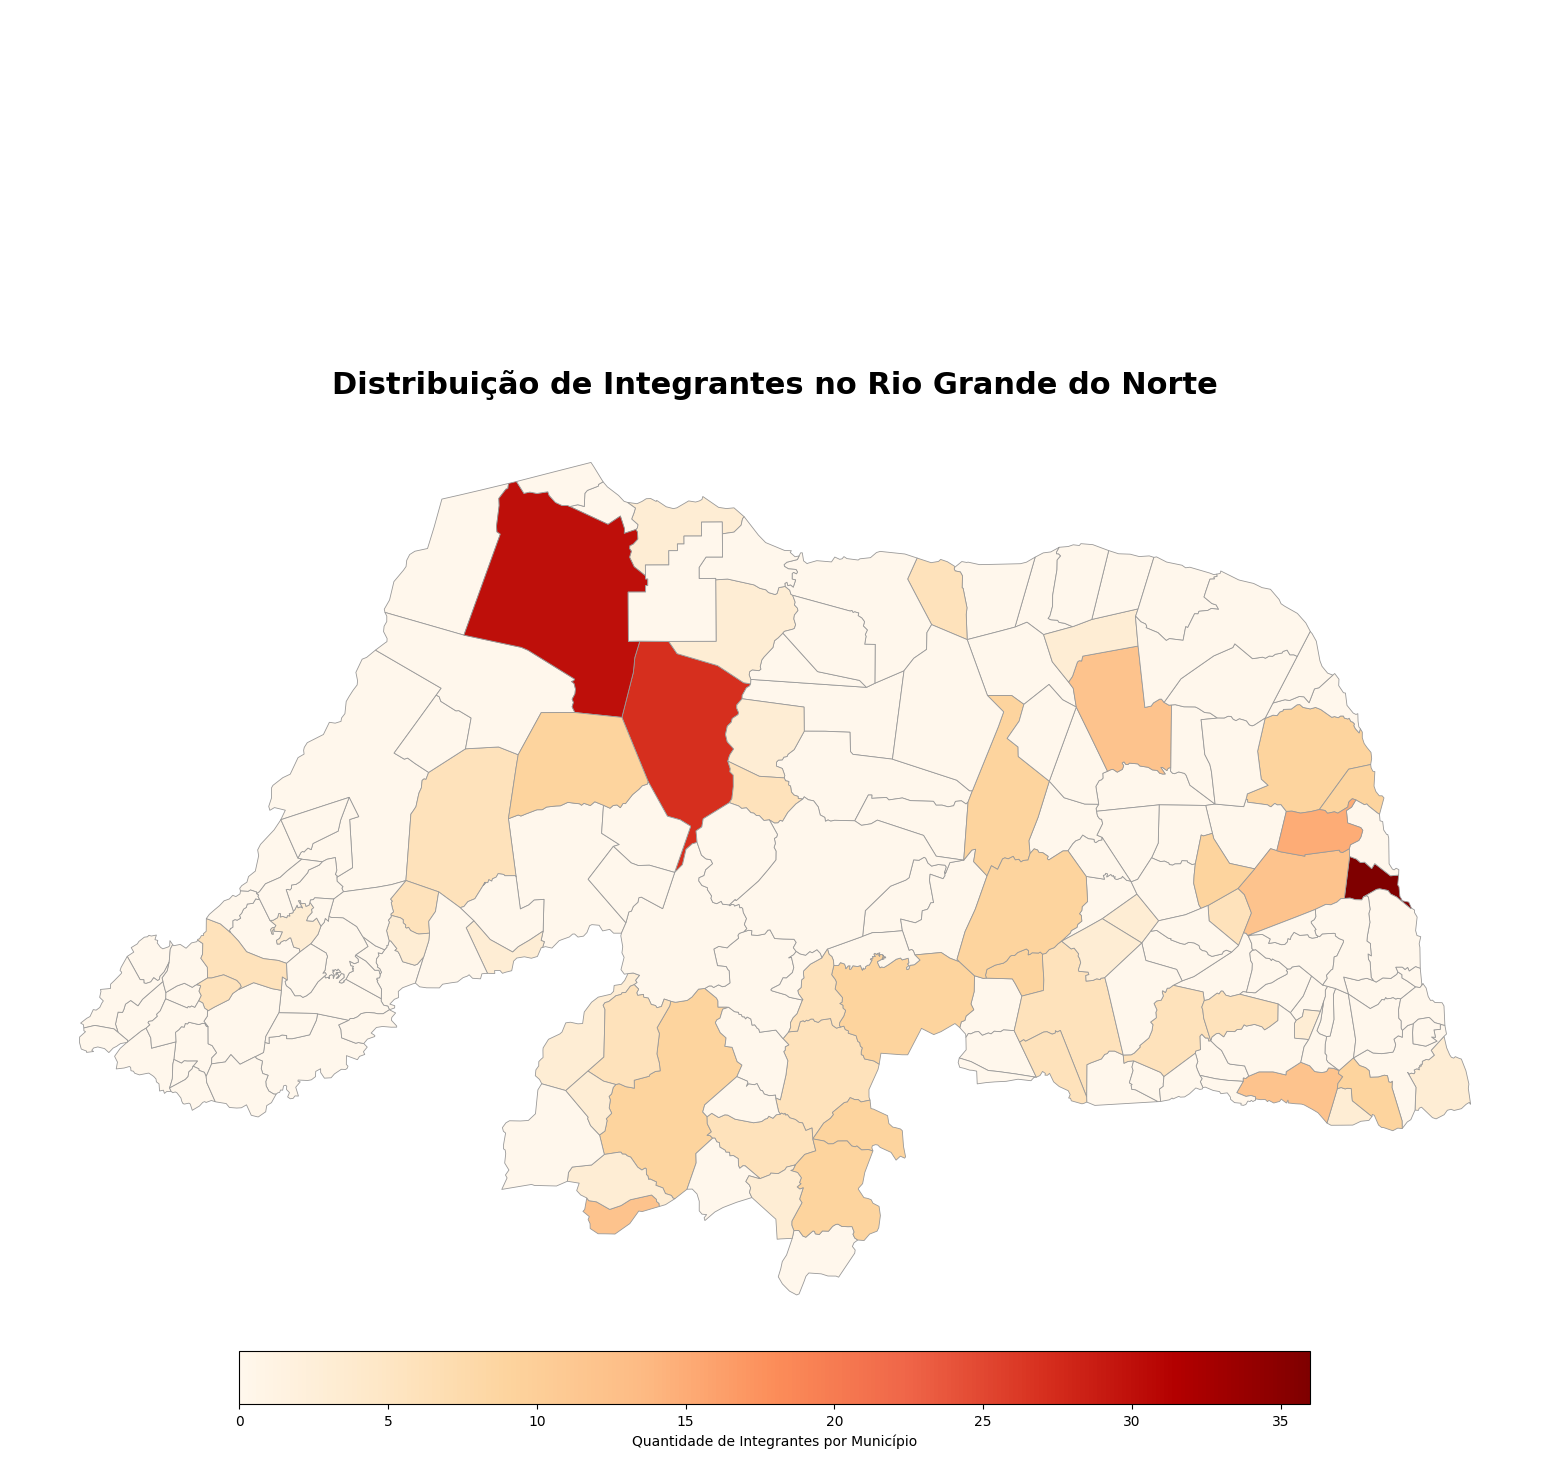

In [ ]:
# ==============================================================================
# PASSO 1: INSTALAR AS BIBLIOTECAS NECESSÁRIAS
# ==============================================================================
# Este comando instala o geopandas, uma biblioteca poderosa para trabalhar com
# dados geoespaciais em Python. 'unidecode' nos ajudará a limpar os nomes.
print("Instalando bibliotecas... (pode levar um minuto)")
!pip install geopandas unidecode --quiet

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode
import warnings

# Ignorar avisos futuros que podem poluir a saída
warnings.filterwarnings('ignore', category=FutureWarning)
print("Bibliotecas instaladas e importadas com sucesso!")

# ==============================================================================
# PASSO 2: CARREGAR OS DADOS
# ==============================================================================
# Define os nomes dos arquivos que você subiu para o Colab
geojson_path = 'geojs-24-mun.json'
csv_path = 'quantitativo_delegados_municipio - Página1.csv'

try:
    # Carrega o mapa do RN (o arquivo GeoJSON)
    gdf_rn = gpd.read_file(geojson_path)

    # Carrega seus dados quantitativos (o arquivo CSV)
    df_quantitativo = pd.read_csv(csv_path)

    # Renomeia as colunas para facilitar o uso (ex: 'Município' -> 'municipio')
    df_quantitativo.columns = ['municipio', 'quantidade']

    print("\nArquivos carregados e dados prontos para o processamento!")
except FileNotFoundError as e:
    print(f"\n[ERRO] Arquivo não encontrado: {e.filename}")
    print("Por favor, verifique se os nomes dos arquivos estão corretos e se você fez o upload deles para o ambiente do Colab.")
except Exception as e:
    print(f"\n[ERRO] Ocorreu um problema ao ler os arquivos: {e}")


# ==============================================================================
# PASSO 3: PREPARAR E JUNTAR OS DADOS (ETAPA CRUCIAL)
# ==============================================================================
# Para que o mapa entenda qual dado pertence a qual município, precisamos
# garantir que os nomes dos municípios correspondam exatamente nos dois arquivos.

# Função para "normalizar" os nomes: remove acentos, converte para maiúsculas e
# corrige pequenas diferenças (como "Olho-d'água" para "OLHO DAGUA").
def normalizar_nome(nome):
    if not isinstance(nome, str):
        return ""
    return unidecode(nome.upper().replace("-", " ").replace("'", ""))

# Aplica a normalização nos dois DataFrames
gdf_rn['nome_normalizado'] = gdf_rn['name'].apply(normalizar_nome)
df_quantitativo['nome_normalizado'] = df_quantitativo['municipio'].apply(normalizar_nome)

# Junta o mapa (gdf_rn) com seus dados (df_quantitativo) usando a coluna normalizada
# O 'how="left"' garante que todos os 167 municípios do RN permaneçam no mapa.
mapa_final = gdf_rn.merge(
    df_quantitativo[['quantidade', 'nome_normalizado']],
    on='nome_normalizado',
    how='left'
)

# Os municípios que não estavam na sua lista receberão o valor 0 (zero)
mapa_final['quantidade'] = mapa_final['quantidade'].fillna(0)

print("\nDados geográficos e quantitativos foram unidos com sucesso!")

# ==============================================================================
# PASSO 4: VISUALIZAÇÃO ESTRATÉGICA DO MAPA
# ==============================================================================
print("Gerando o mapa de calor...")

# Define o tamanho da figura do mapa
fig, ax = plt.subplots(1, 1, figsize=(16, 16))

# ---- AQUI VOCÊ PODE CUSTOMIZAR O DESIGN ----

# Plotagem do mapa
mapa_final.plot(
    column='quantidade',      # Coluna com os valores para colorir o mapa
    cmap='OrRd',              # **DESIGN:** Esquema de cores "Quente" (Laranja-Vermelho)
    linewidth=0.6,              # Espessura da borda dos municípios
    ax=ax,
    edgecolor='0.6',          # **DESIGN:** Cor da borda (cinza escuro)
    legend=True,              # Mostra a legenda de cores
    legend_kwds={
        'label': "Quantidade de Integrantes por Município",
        'orientation': "horizontal",
        'shrink': 0.7,          # **DESIGN:** Ajusta o tamanho da barra de legenda
        'pad': 0.01             # Espaçamento da legenda em relação ao mapa
    }
)

# Adiciona um título estratégico
ax.set_title(
    'Distribuição de Integrantes no Rio Grande do Norte',
    fontdict={'fontsize': 22, 'fontweight': 'bold'},
    pad=20
)

# Adiciona um subtítulo para dar contexto
ax.annotate(
    'Análise quantitativa para visualização de concentração regional.\nMunicípios sem dados (0) aparecem em branco.',
    xy=(0.1, .98), xycoords='figure fraction',
    ha='left', va='top',
    fontsize=12,
    color='#555555'
)

# Remove os eixos de coordenadas (Latitude/Longitude) para um visual mais limpo
ax.set_axis_off()

# Ajusta a margem para a legenda não cortar
plt.tight_layout()

# Salva o mapa em alta resolução
plt.savefig('mapa_estrategico_rn.png', dpi=300)

print("\nMapa finalizado e salvo como 'mapa_estrategico_rn.png'")

# Mostra o mapa
plt.show()